In [23]:
import pandas as pd
import numpy as np

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [28]:
#1

file = "data/data_int.txt"
lst = str(list(range(0,10)))
with open(file, 'a') as outfile:
    outfile.write(lst)
    
with open(file, mode = 'r') as f:
     print(f.read())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [31]:
#2

file = "data/data_float.txt"
mtrx = str([[0.0 for x in range(5)] for y in range(5)])
with open(file, 'a') as outfile:
    outfile.write(mtrx)
    
with open(file, mode = 'r') as f:
     print(f.read())    

[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]


In [33]:
#3

import csv 

file1 = "data/data_int.txt"

with open(file1, 'r') as in_file:
    with open('data/data_int.csv', 'a') as out_file:
        writer = csv.writer(out_file)
        data = in_file.read()
        data = data.replace("[", "").replace("]", "")
        mylist = list(int(i) for i in data.split(','))
        print(mylist)
        writer.writerow(mylist)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [35]:
with open('data/data_int.csv', 'r') as csv_file:
    print("csv file containing the list of int: ", csv_file.read())

csv file containing the list of int:  0,1,2,3,4,5,6,7,8,9




2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [50]:
import json, csv

#Filtering data
data = json.load(open('data/user_data.json'))
filtered = [dict for dict in data if dict['CreditCardType']=='American Express']
print("Filtered data: \n", filtered)

#Writing the result in csv file
writer = csv.DictWriter(open('data/jsons.csv', 'a'), filtered[0].keys())
for dict in filtered:
    writer.writerow(dict)

Filtered data: 
 [{'ID': '2', 'JobTitle': 'Investment  Advisor', 'EmailAddress': 'Clint_Thorpe5003@bulaffy.com', 'FirstNameLastName': 'Clint Thorpe', 'CreditCard': '7083-8766-0251-2345', 'CreditCardType': 'American Express'}, {'ID': '12', 'JobTitle': 'Retail Trainee', 'EmailAddress': 'Phillip_Carpenter9505@famism.biz', 'FirstNameLastName': 'Phillip Carpenter', 'CreditCard': '3657-0088-0820-5247', 'CreditCardType': 'American Express'}, {'ID': '28', 'JobTitle': 'Project Manager', 'EmailAddress': 'Russel_Graves1378@extex.org', 'FirstNameLastName': 'Russel Graves', 'CreditCard': '6718-4818-8011-6024', 'CreditCardType': 'American Express'}, {'ID': '39', 'JobTitle': 'Stockbroker', 'EmailAddress': 'Leanne_Newton1268@typill.biz', 'FirstNameLastName': 'Leanne Newton', 'CreditCard': '5438-0816-4166-4847', 'CreditCardType': 'American Express'}, {'ID': '57', 'JobTitle': 'Budget Analyst', 'EmailAddress': 'Tony_Giles1960@iatim.tech', 'FirstNameLastName': 'Tony Giles', 'CreditCard': '8130-3425-7573-7

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [74]:
import pandas as pd

df = pd.read_csv("data/mushrooms_categorized.csv")

means = df.groupby(["class"]).agg('mean')
means

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [127]:
with open('data/credit_card.dat','rb') as file:
    while True:
        file_content=file.readline()
        
        # read the file dividing the sequences of 6 bits
        ints=[]
        try:
            for i in range(0,19*6,6):
                if (i==24 or i==54 or i==84):
                    continue
                ints.append(int(file_content[i:i+6], 2))
        except ValueError:
            break
            
        # print the resulting line
        print("-". join(str(j) for j in ints))
    

55-54-52-56-53-54-55-51-51-55-55-53-50-50-55-49
51-50-53-55-56-50-52-55-51-51-53-52-50-50-54-54
50-55-50-50-48-48-48-49-52-48-49-49-54-54-53-50
48-54-54-49-51-48-54-51-51-55-52-50-51-49-53-48
48-52-51-50-49-54-48-56-49-52-54-50-52-55-52-50
53-56-50-55-50-48-50-55-56-55-56-53-55-51-48-51
53-55-55-52-56-53-50-56-50-48-56-55-49-49-49-55
56-49-52-48-49-50-49-48-54-51-53-50-50-56-52-53
53-55-54-52-49-49-51-51-55-51-48-49-55-49-48-48
54-52-53-54-49-55-51-55-52-49-50-54-54-55-50-54
49-50-50-56-56-54-51-49-55-51-56-50-48-48-48-48
55-48-53-49-48-49-54-48-53-51-55-52-51-49-54-54
48-54-49-56-51-53-56-55-49-54-51-48-54-51-55-54
49-53-52-53-53-52-53-52-55-52-52-52-53-54-51-54
54-55-51-53-51-49-49-54-51-50-48-50-54-56-51-52
55-50-56-55-53-48-49-49-49-53-52-55-56-52-49-51
55-48-51-51-50-54-48-55-51-51-50-56-52-50-48-48
50-53-54-56-53-50-52-52-49-56-55-52-53-48-50-52
49-54-56-52-50-50-53-51-55-53-55-48-55-49-49-56
48-54-55-50-50-53-55-54-48-53-55-53-54-54-51-49
54-51-51-50-56-51-53-51-56-55-56-55-49-5

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

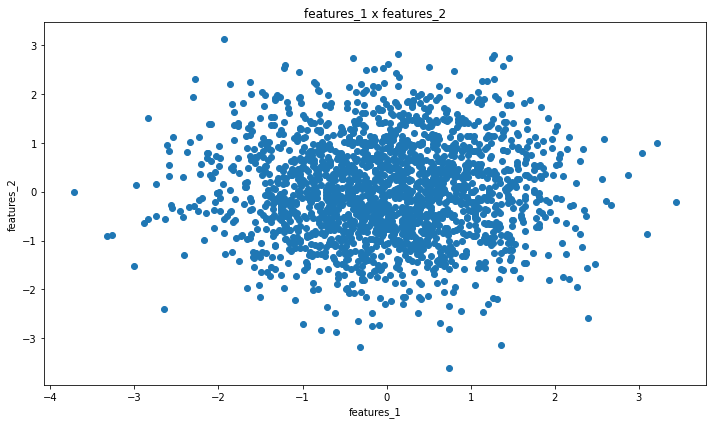

In [135]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt

#Plotting one combination as example
file = "data/regression_generated.csv"
df = pd.read_csv(file)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["features_1"],df["features_2"])
ax.set_title('features_1 x features_2')
ax.set_ylabel('features_2')
ax.set_xlabel('features_1')
fig.tight_layout()